In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Import dataset

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


Remove columns with string values.

In [4]:
df = df.drop('Unnamed: 0', axis = 1)
df = df.drop('song_title', axis = 1)
df = df.drop('artist', axis = 1)

In [5]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


Parse features and labels from data and transform to numpy arrays.

In [6]:
xtrain_df = df[df.columns[:13]]
xtrain_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904


In [7]:
x_train = xtrain_df.to_numpy()

In [8]:
ytrain_df = df['target']

In [9]:
y_train = ytrain_df.to_numpy()

In [10]:
print('Shape of x_train is:' , x_train.shape)

Shape of x_train is: (2017, 13)


In [11]:
print('Shape of y_train is:' , y_train.shape)

Shape of y_train is: (2017,)


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [13]:
x_train[0]

array([-0.68246675,  1.33287384, -0.50885114, -1.17770008, -0.40786448,
       -0.91644642, -0.16629082, -0.45453036,  0.79573763,  3.76308393,
        1.06670945,  0.12404825, -0.8530387 ])

In [28]:
from sklearn.model_selection import train_test_split

y_train = y_train.reshape(2017,1)

X_train , X_test , Y_train , Y_test = train_test_split(x_train , y_train , test_size = 0.33 , random_state = 42)

In [29]:
#Neural Network

import tensorflow as tf

In [30]:
X_train.shape

(1351, 13)

In [31]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(13 , activation = tf.keras.activations.relu))
#model.add(tf.keras.layers.Dense(64 , activation = tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(20 , activation = tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(1 , activation = tf.keras.activations.sigmoid))

model.compile(optimizer = 'adam' ,
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

history = model.fit(X_train,Y_train,epochs = 110, validation_data=(X_test, Y_test), verbose = 0)
finalAccuracy = history.history['accuracy'][-1]

train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

epoch_count = range(1, len(train_loss) + 1)


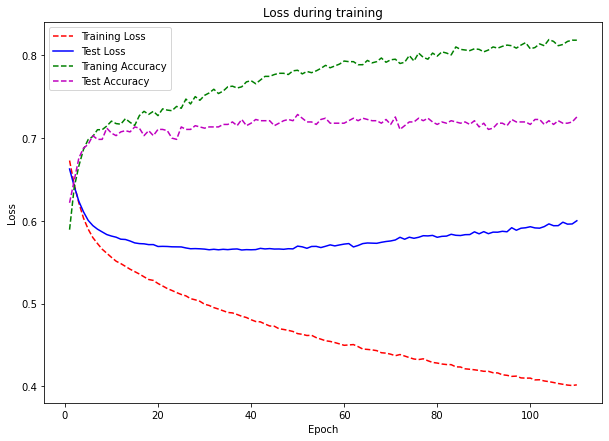

In [32]:
#Plotting Loss and Accuracy
plt.figure(figsize = (10,7))
plt.plot(epoch_count, train_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.plot(epoch_count , train_accuracy , 'g--')
plt.plot(epoch_count , test_accuracy , 'm--')
plt.legend(['Training Loss', 'Test Loss', 'Traning Accuracy' , 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss during training')
plt.show();

In [33]:
finalAccuracy

0.81791264

In [34]:
df_history = pd.DataFrame(history.history)

In [35]:
df_history.tail(1)

,loss,accuracy,val_loss,val_accuracy
109,0.401877,0.817913,0.599955,0.725225
